<a href="https://colab.research.google.com/github/ApahSaroj/WQC/blob/main/XGBoost_WQC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('WPI',case = False)],axis = 1, inplace = True)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,Excellent
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,Excellent
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,Excellent
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,Excellent
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,Excellent
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,Excellent
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,Excellent
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,Good


In [4]:
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,Excellent
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,Excellent
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,Excellent
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,Excellent
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,Excellent


In [5]:
target_name = 'WQC'

In [6]:
categorical_features = []
features_names = []

In [7]:
for col in df.columns:
    features_names.append(col)
    
    if df[col].dtype == 'object': #categorical features
        if col != target_name:
            categorical_features.append(col)
        else:
        #if True:
            unique_values =  df[col].unique()
            print(col," column has ",unique_values," classes")

            for j in range(0, len(unique_values)):
                idx = df[df[col] == unique_values[j]].index
                df.loc[idx, col] = j
                print(unique_values[j]," is transformed to ",(j))

WQC  column has  ['Excellent' 'Good' 'moderately polluted water' 'highly polluted water']  classes
Excellent  is transformed to  0
Good  is transformed to  1
moderately polluted water  is transformed to  2
highly polluted water  is transformed to  3


In [8]:

print("data set features: ", features_names)
print("categorical features in the data set: ", categorical_features)

data set features:  ['pH', 'DO', 'TDS', 'Alkalinity', 'EC', 'Na', 'Ca', 'Mg', 'K', 'F', 'Cl', 'Nitrate', 'Sulphate', 'Phosphate', 'WQC']
categorical features in the data set:  []


In [9]:
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0


In [10]:
import xgboost

In [11]:
enableRegression = False #classification or regression

In [17]:
if enableRegression:
    objective = 'rmse'
    eval_metric = 'rmse'
else:
    eval_metric = 'mlogloss'
    if len(df[target_name].unique()) == 2:
        objective = 'binary:logistic'
    else:
        objective = 'multi:softmax'

In [18]:
params = {
    'learning_rate': 0.01
    , 'max_depth': 5
    , 'min_child_weight': 0.5
    , 'n_estimators': 250
    , 'seed': 17
    , 'nthread':  2
    , 'object':  objective
    #, 'num_classes':  len(df[target_name].unique())
}

In [19]:
if enableRegression:
    model = xgboost.XGBRegressor(**params)
else:
    model = xgboost.XGBClassifier(**params)

In [20]:
eval_set = [(df.drop(columns=[target_name]), df[target_name])]

In [21]:
model.fit(df.drop(columns=[target_name]), df[target_name]
         , eval_metric=eval_metric
          , eval_set=eval_set, early_stopping_rounds=5, verbose=True
         )

[0]	validation_0-mlogloss:1.36713
Will train until validation_0-mlogloss hasn't improved in 5 rounds.
[1]	validation_0-mlogloss:1.34838
[2]	validation_0-mlogloss:1.33002
[3]	validation_0-mlogloss:1.31203
[4]	validation_0-mlogloss:1.29441
[5]	validation_0-mlogloss:1.27714
[6]	validation_0-mlogloss:1.26021
[7]	validation_0-mlogloss:1.24362
[8]	validation_0-mlogloss:1.22725
[9]	validation_0-mlogloss:1.21128
[10]	validation_0-mlogloss:1.19552
[11]	validation_0-mlogloss:1.18013
[12]	validation_0-mlogloss:1.16495
[13]	validation_0-mlogloss:1.15013
[14]	validation_0-mlogloss:1.13544
[15]	validation_0-mlogloss:1.12101
[16]	validation_0-mlogloss:1.10692
[17]	validation_0-mlogloss:1.09299
[18]	validation_0-mlogloss:1.07938
[19]	validation_0-mlogloss:1.06592
[20]	validation_0-mlogloss:1.05277
[21]	validation_0-mlogloss:1.03976
[22]	validation_0-mlogloss:1.02696
[23]	validation_0-mlogloss:1.01445
[24]	validation_0-mlogloss:1.00207
[25]	validation_0-mlogloss:0.98988
[26]	validation_0-mlogloss:0.977

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=0.5, missing=None, n_estimators=250, n_jobs=1,
              nthread=2, object='multi:softmax', objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=17, silent=None, subsample=1, verbosity=1)

In [22]:
from xgboost import plot_importance

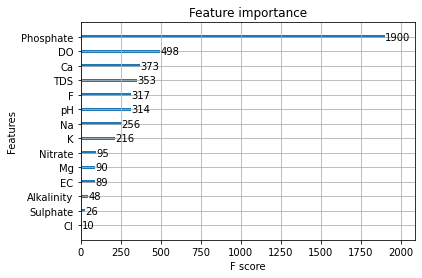

In [23]:
plot_importance(model)

In [24]:
predictions = model.predict(df.drop(columns=[target_name]))

In [25]:
actuals = df[target_name].values

In [26]:
actuals

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
mae = 0

for i in range(0, len(predictions)):
    prediction = predictions[i]
    actual = actuals[i]
    
    if enableRegression:
        error = abs(actual - prediction)
        mae += error
        print("Prediction is ", prediction," whereas actual was ", actual," (Error: ",error,")")
    else:
        print("Prediction is ", prediction," whereas actual was ", actual, end ='')

        if actual == prediction:
            print(" (CLASSIFIED)")
        else:
            print(" (UNCLASSIFIED)")

if enableRegression:
    mae = mae / len(predictions)
    print("MAE: ", mae)

Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  1  whereas actual was  1 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASS